#### Importing libraries

In [1]:
from chembl_webresource_client.new_client import new_client
import pandas as pd

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from rdkit import Chem, DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import Draw

# All we need for clustering
from scipy.cluster.hierarchy import dendrogram, linkage

import ast

#### Getting file content

In [2]:
#Open the file
with open('Smp_022470.txt','r') as f:
    data = f.read()
    
# Split file content and strip newlines
cmp = data.split(',',1)
cmp_strip = cmp[1].strip()

#Getting dictionary into a dataframe
cmp_dict = ast.literal_eval(cmp_strip)
cmp_df = pd.DataFrame.from_dict(cmp_dict)

#Put content of dataframe into a list
cmp_list = list(cmp_df['molecule_chembl_id'])

In [6]:
len(cmp_list)

87

#### Search for the molecules in chembl using the client API

In [3]:
# Search and put them in mols variable
molecule = new_client.molecule
mols = molecule.filter(molecule_chembl_id__in=cmp_list).only(['molecule_chembl_id', 'molecule_structures'])

#### Get the Canonical smiles and Compound IDs

In [7]:
molecule_chembl_id = []
Canonical_smiles = []

for mol in mols:
    cmp_id = mol['molecule_chembl_id']
    smile = mol['molecule_structures']['canonical_smiles']
    Canonical_smiles.append(smile)
    molecule_chembl_id.append(cmp_id)
    #print(smile,cmp_id)
    
#Bundling the two lists together
comp_list_bundled = list(zip(Canonical_smiles, molecule_chembl_id))


In [5]:
len(comp_list_bundled)

85

In [8]:
comp_list_bundled

[('O=c1[nH]c2ccccc2c(=O)n1O', 'CHEMBL183852'),
 ('O=c1[nH]c2sccc2c(=O)n1O', 'CHEMBL361350'),
 ('Cc1ccc(-c2coc3c(=O)n(O)c(=O)[nH]c23)cc1', 'CHEMBL182381'),
 ('O=c1c2ccsc2n(Cc2ccccc2)c(=O)n1O', 'CHEMBL182974'),
 ('O=c1[nH]c2c(-c3ccccc3)csc2c(=O)n1O', 'CHEMBL361011'),
 ('O=C(O)c1nc(-c2cccs2)nc(O)c1O', 'CHEMBL181653'),
 ('COc1nc(-c2cccs2)nc(C(=O)O)c1O', 'CHEMBL183018'),
 ('O=C(O)c1nc(-c2ccccc2)nc(O)c1O', 'CHEMBL440562'),
 ('COC(=O)c1nc(-c2cccs2)nc(O)c1O', 'CHEMBL187010'),
 ('Cn1c(-c2cccs2)nc(C(=O)O)c(O)c1=O', 'CHEMBL366051'),
 ('O=C(NCc1ccc(F)cc1)c1nc(-c2cccs2)nc(O)c1O', 'CHEMBL216874'),
 ('NC(=O)c1nc(-c2cccs2)nc(O)c1O', 'CHEMBL223338'),
 ('COc1ccc2nc3cc(Cl)ccc3c(Nc3ccc(O)c(CN4CCN(C)CC4)c3)c2c1', 'CHEMBL463783'),
 ('O=C1c2cccc3cccc(c23)C(=O)N1O', 'CHEMBL1207029'),
 ('O=C1c2cccc3c(Cl)ccc(c23)C(=O)N1O', 'CHEMBL1415852'),
 ('O=c1[nH]ccc(-c2ccc(F)cc2)c1O', 'CHEMBL2443223'),
 ('O=c1[nH]cc(-c2ccc(F)cc2)cc1O', 'CHEMBL2443225'),
 ('O=c1[nH]c(-c2ccc(F)cc2)ccc1O', 'CHEMBL2443229'),
 ('O=C(CNc1ccccc1

#### Put them in one library

In [9]:
working_library=[]

for item in comp_list_bundled:
    mol=Chem.MolFromSmiles(item[0])
    mol.SetProp('_Name',item[1])
    working_library.append(mol)

#### Draw them for clarity sake

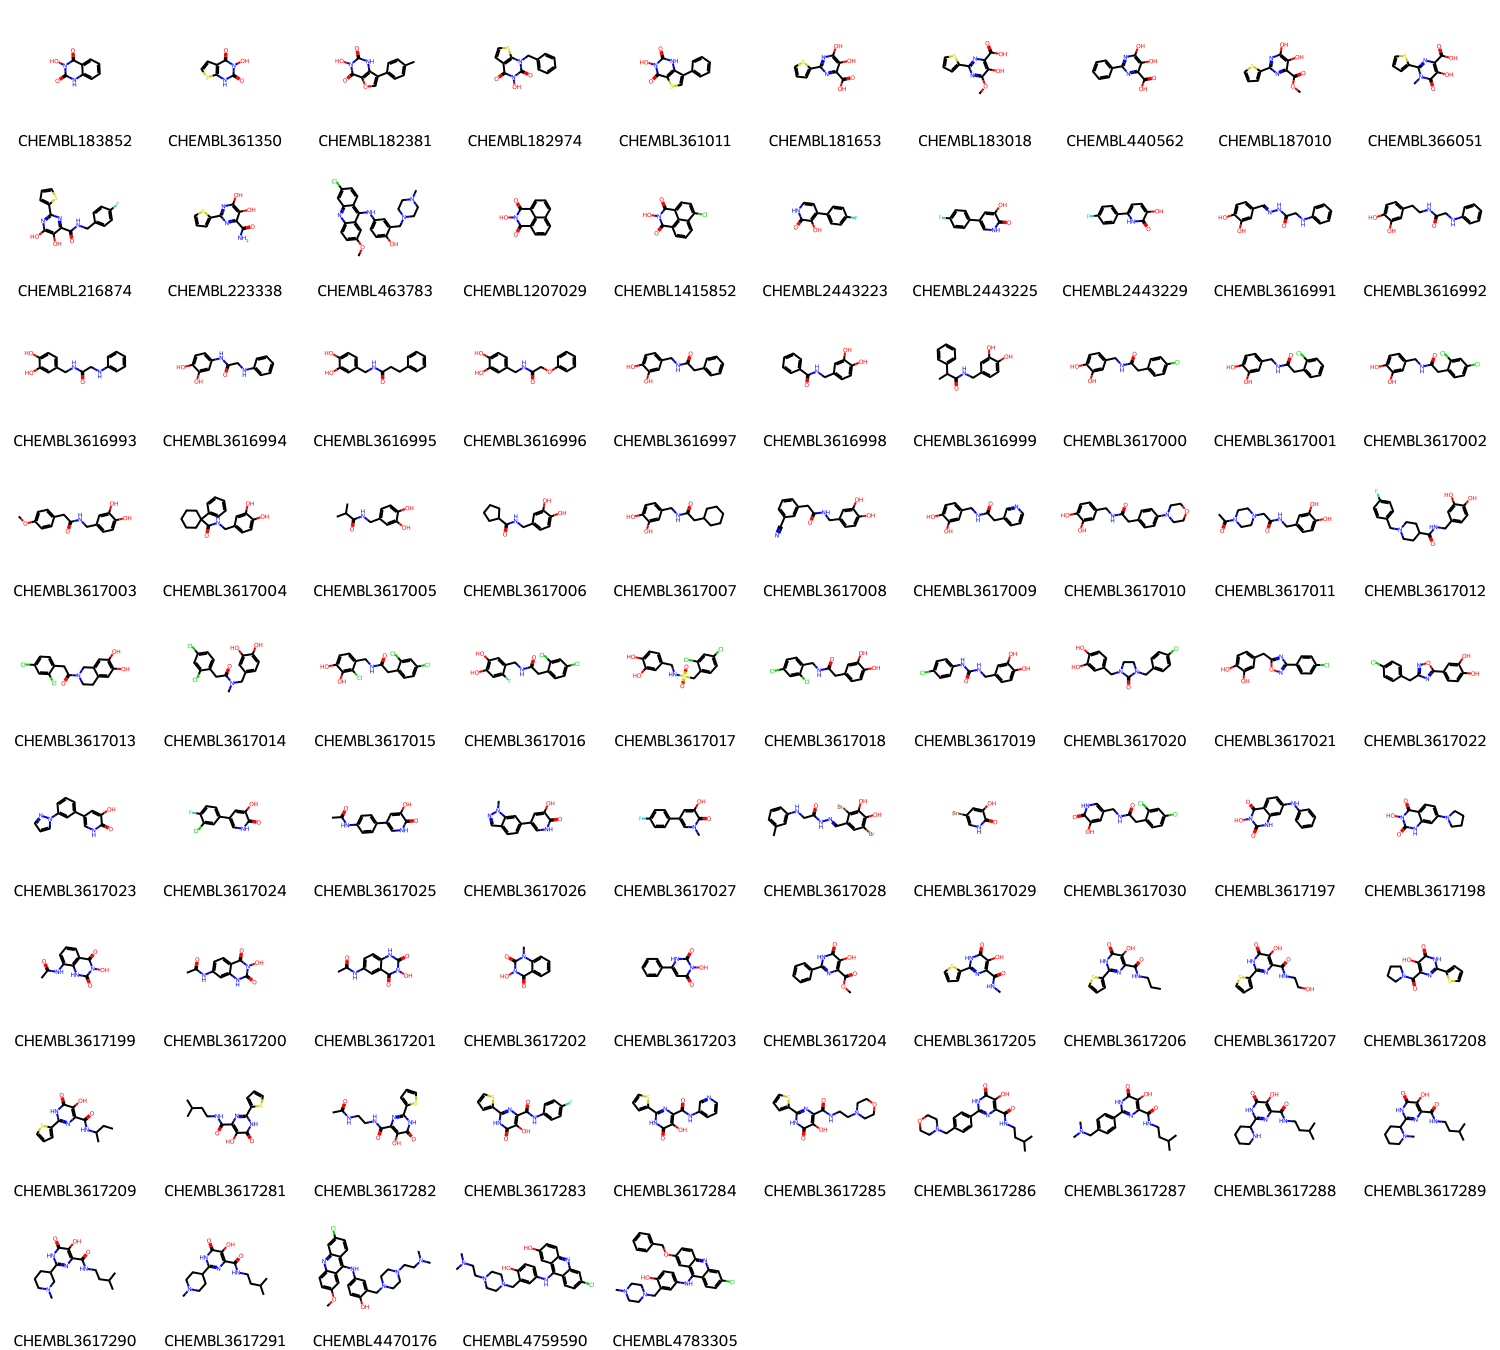

In [13]:
Draw.MolsToGridImage(working_library,molsPerRow=10,subImgSize=(150,150),
                     legends=[mol.GetProp('_Name') for mol in working_library], maxMols=100)

#### Getting fingerprints

In [14]:
fps= [FingerprintMols.FingerprintMol(mol) for mol in working_library]

print(len(working_library))
print(len(fps))

85
85


#### Similarity check using just two of the molecules

In [15]:
DataStructs.FingerprintSimilarity(fps[0],fps[1])

0.5737704918032787

#### All versus all similarity

In [16]:
size=len(working_library)
hmap=np.empty(shape=(size,size))
table=pd.DataFrame()
for index, i in enumerate(fps):
    for jndex, j in enumerate(fps):
        similarity=DataStructs.FingerprintSimilarity(i,j)
        hmap[index,jndex]=similarity
        table.loc[working_library[index].GetProp('_Name'),working_library[jndex].GetProp('_Name')]=similarity

In [17]:
table.head(10)

,CHEMBL183852,CHEMBL361350,CHEMBL182381,CHEMBL182974,CHEMBL361011,CHEMBL181653,CHEMBL183018,CHEMBL440562,CHEMBL187010,CHEMBL366051,...,CHEMBL3617285,CHEMBL3617286,CHEMBL3617287,CHEMBL3617288,CHEMBL3617289,CHEMBL3617290,CHEMBL3617291,CHEMBL4470176,CHEMBL4759590,CHEMBL4783305
CHEMBL183852,1.000000,0.573770,0.537129,0.516168,0.528822,0.375000,0.393643,0.363636,0.388133,0.416000,...,0.407895,0.410758,0.408750,0.417800,0.414958,0.404645,0.402778,0.413450,0.409091,0.420664
CHEMBL361350,0.573770,1.000000,0.361753,0.639740,0.403814,0.249147,0.259772,0.227066,0.252883,0.290128,...,0.287758,0.273896,0.274314,0.270292,0.276054,0.283607,0.268251,0.265876,0.264477,0.274461
CHEMBL182381,0.537129,0.361753,1.000000,0.427502,0.556923,0.294160,0.308711,0.283969,0.311615,0.345850,...,0.349239,0.362473,0.350725,0.329593,0.339100,0.333099,0.316739,0.300570,0.293439,0.318278
CHEMBL182974,0.516168,0.639740,0.427502,1.000000,0.444136,0.301476,0.324435,0.264727,0.313833,0.379763,...,0.366916,0.358568,0.349965,0.340426,0.353261,0.344804,0.322558,0.342124,0.340333,0.354680
CHEMBL361011,0.528822,0.403814,0.556923,0.444136,1.000000,0.302343,0.320567,0.276628,0.315186,0.361316,...,0.347493,0.354954,0.339130,0.347670,0.354270,0.349354,0.331126,0.287340,0.280980,0.297828
CHEMBL181653,0.375000,0.249147,0.294160,0.301476,0.302343,1.000000,0.903263,0.737606,0.931490,0.586937,...,0.516444,0.410970,0.412740,0.345558,0.352000,0.336570,0.327731,0.246845,0.238209,0.256192
CHEMBL183018,0.393643,0.259772,0.308711,0.324435,0.320567,0.903263,1.000000,0.672167,0.859186,0.579345,...,0.510980,0.415323,0.415973,0.353630,0.359663,0.341841,0.330400,0.266362,0.255385,0.276946
CHEMBL440562,0.363636,0.227066,0.283969,0.264727,0.276628,0.737606,0.672167,1.000000,0.693878,0.462674,...,0.393701,0.447539,0.462136,0.319039,0.324097,0.314261,0.313339,0.226399,0.219015,0.232653
CHEMBL187010,0.388133,0.252883,0.311615,0.313833,0.315186,0.931490,0.859186,0.693878,1.000000,0.569374,...,0.510711,0.414894,0.414346,0.351266,0.357420,0.339342,0.328734,0.258065,0.248834,0.268882
CHEMBL366051,0.416000,0.290128,0.345850,0.379763,0.361316,0.586937,0.579345,0.462674,0.569374,1.000000,...,0.618890,0.505882,0.497193,0.420344,0.430258,0.423221,0.405073,0.284410,0.275373,0.293914


#### HCL clustering

In [18]:
linked = linkage(hmap,'single')
labelList = [mol.GetProp('_Name') for mol in working_library]

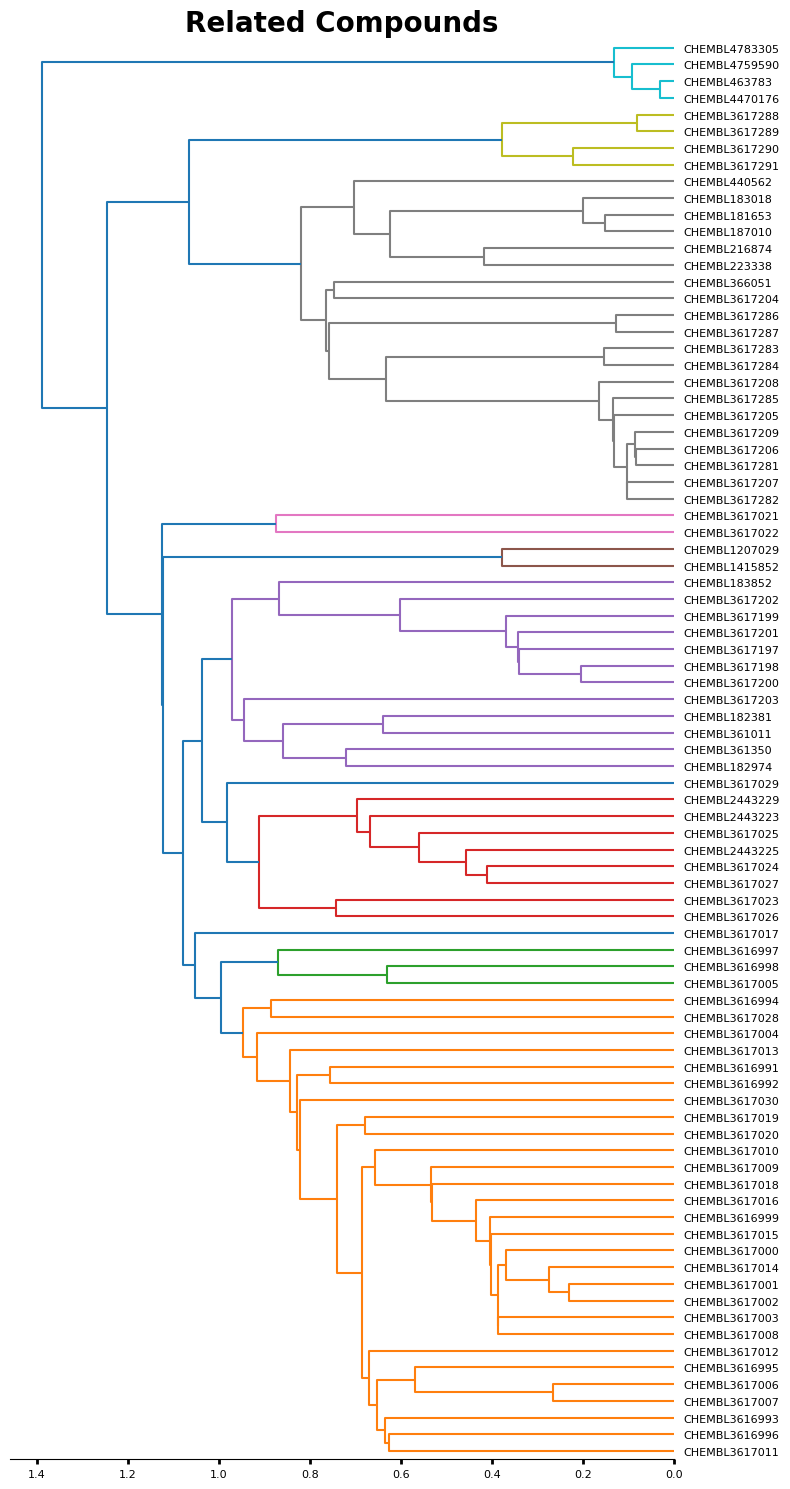

In [20]:
plt.figure(figsize=(8,15))

ax1=plt.subplot()
o=dendrogram(linked,  
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)

ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.title('Related Compounds',fontsize=20,weight='bold')
plt.tick_params ('both',width=2,labelsize=8)
plt.tight_layout()
plt.show() 

In [23]:
# This will give us the clusters in order as the last plot
new_data=list(reversed(o['ivl']))

# we create a new table with the order of HCL
hmap_2=np.empty(shape=(size,size))
for index,i in enumerate(new_data):
    for jndex,j in enumerate(new_data):
        hmap_2[index,jndex]=table.loc[i].at[j]

In [25]:
new_data

['CHEMBL4783305',
 'CHEMBL4759590',
 'CHEMBL463783',
 'CHEMBL4470176',
 'CHEMBL3617288',
 'CHEMBL3617289',
 'CHEMBL3617290',
 'CHEMBL3617291',
 'CHEMBL440562',
 'CHEMBL183018',
 'CHEMBL181653',
 'CHEMBL187010',
 'CHEMBL216874',
 'CHEMBL223338',
 'CHEMBL366051',
 'CHEMBL3617204',
 'CHEMBL3617286',
 'CHEMBL3617287',
 'CHEMBL3617283',
 'CHEMBL3617284',
 'CHEMBL3617208',
 'CHEMBL3617285',
 'CHEMBL3617205',
 'CHEMBL3617209',
 'CHEMBL3617206',
 'CHEMBL3617281',
 'CHEMBL3617207',
 'CHEMBL3617282',
 'CHEMBL3617021',
 'CHEMBL3617022',
 'CHEMBL1207029',
 'CHEMBL1415852',
 'CHEMBL183852',
 'CHEMBL3617202',
 'CHEMBL3617199',
 'CHEMBL3617201',
 'CHEMBL3617197',
 'CHEMBL3617198',
 'CHEMBL3617200',
 'CHEMBL3617203',
 'CHEMBL182381',
 'CHEMBL361011',
 'CHEMBL361350',
 'CHEMBL182974',
 'CHEMBL3617029',
 'CHEMBL2443229',
 'CHEMBL2443223',
 'CHEMBL3617025',
 'CHEMBL2443225',
 'CHEMBL3617024',
 'CHEMBL3617027',
 'CHEMBL3617023',
 'CHEMBL3617026',
 'CHEMBL3617017',
 'CHEMBL3616997',
 'CHEMBL3616998',
 'CHE

[]

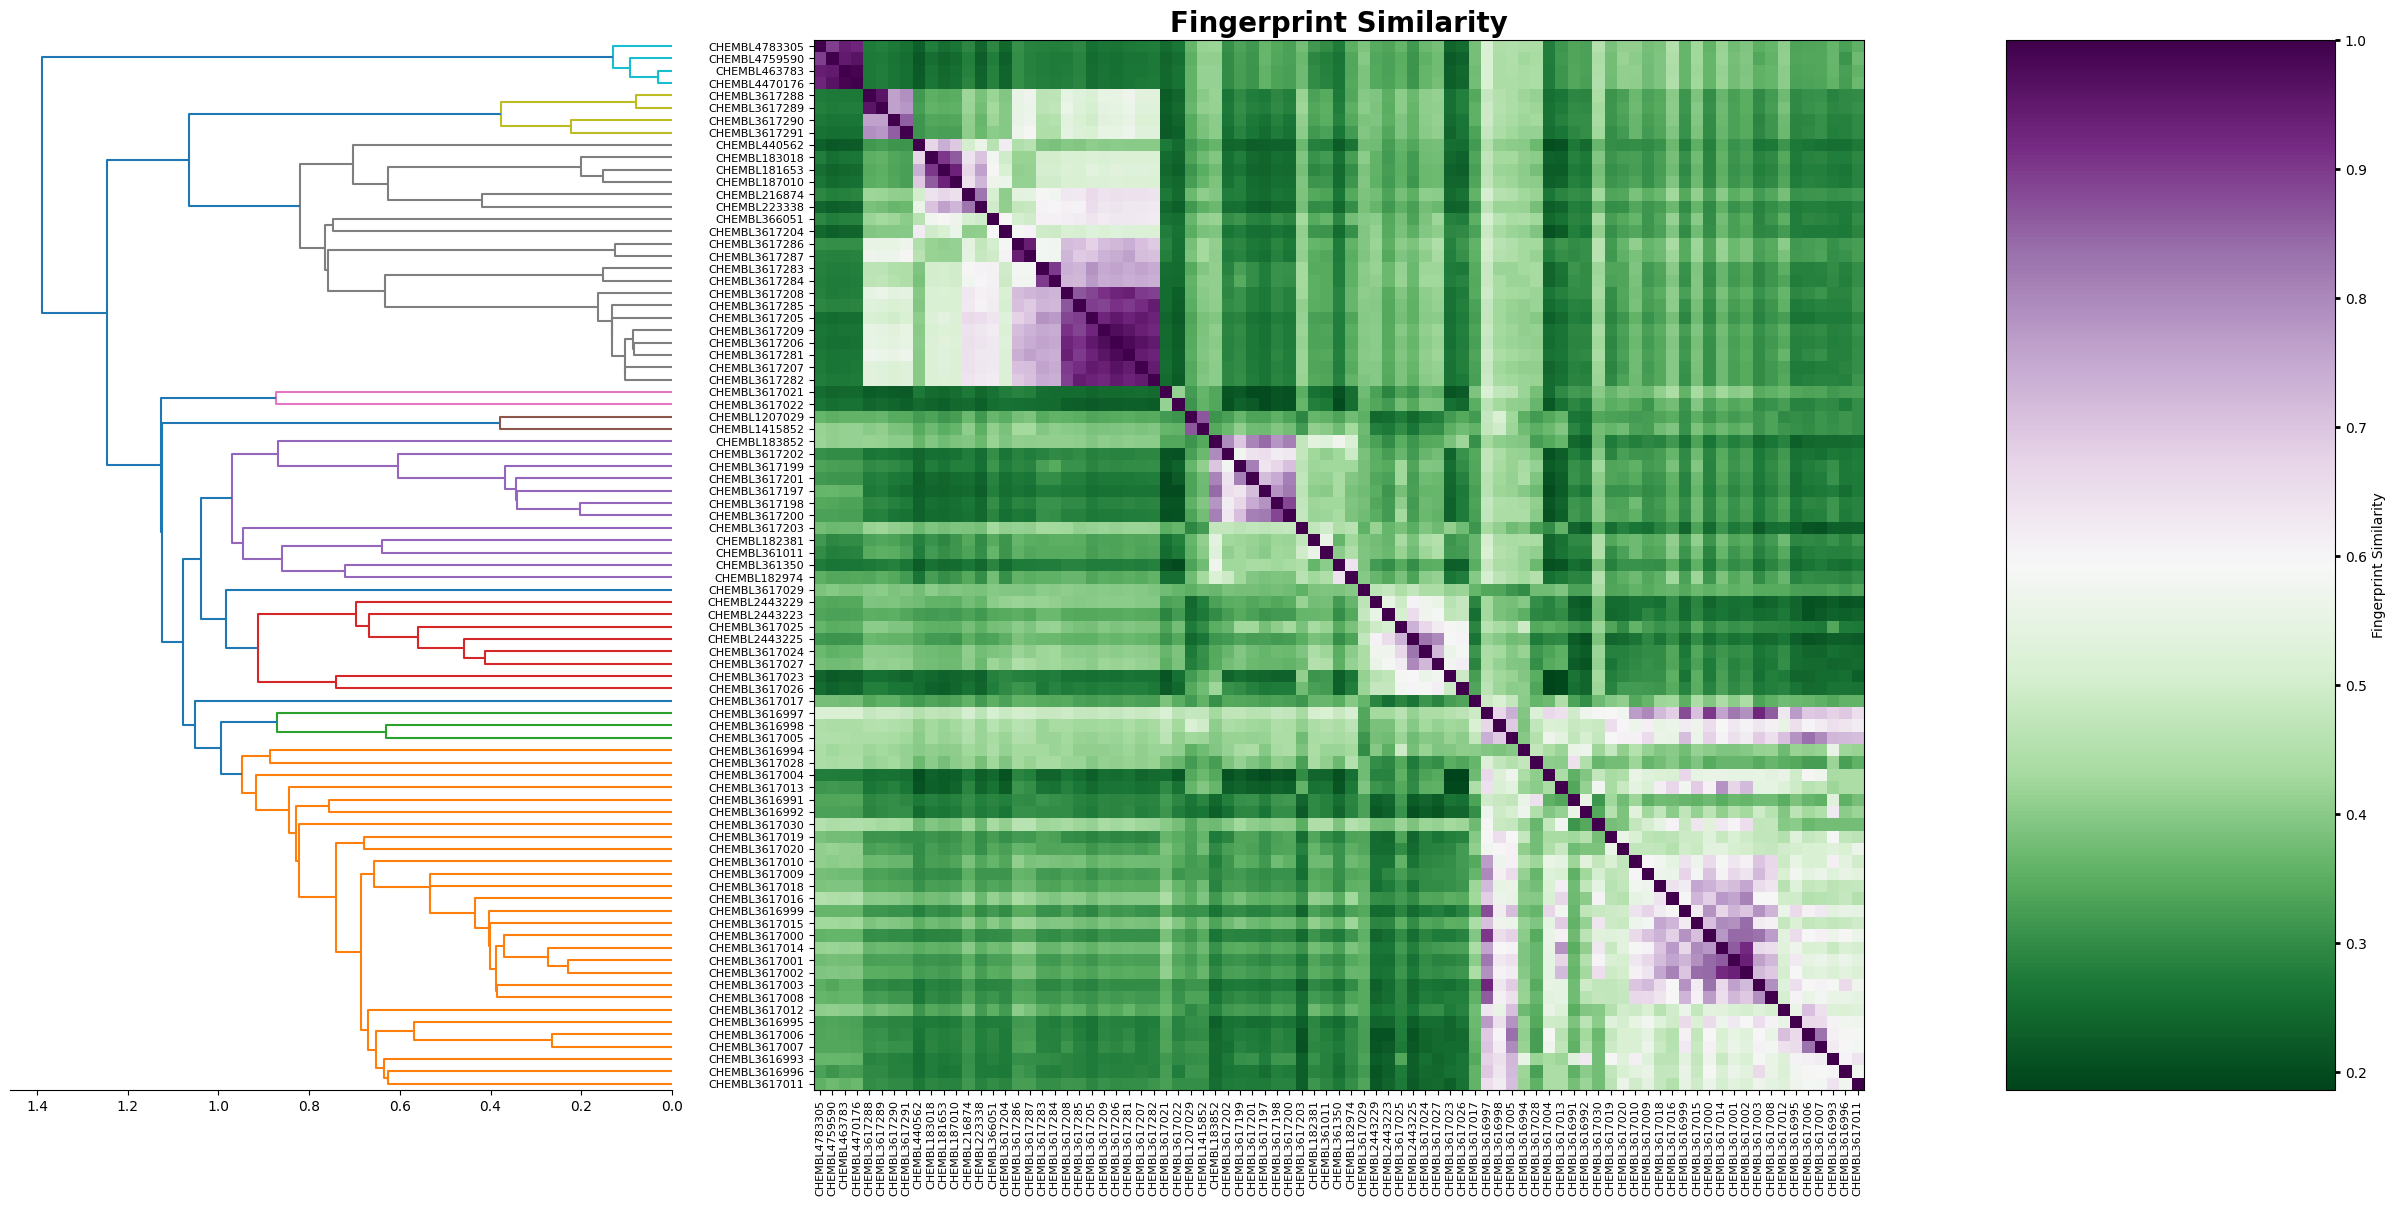

In [26]:

figure= plt.figure(figsize=(30,30))
gs1 = gridspec.GridSpec(2,7)
gs1.update(wspace=0.01)
ax1 = plt.subplot(gs1[0:-1, :2])
dendrogram(linked, orientation='left', distance_sort='descending',show_leaf_counts=True,no_labels=True)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2 = plt.subplot(gs1[0:-1,2:6])
f=ax2.imshow (hmap_2, cmap='PRGn_r', interpolation='nearest')

ax2.set_title('Fingerprint Similarity',fontsize=20,weight='bold')
ax2.set_xticks (range(len(new_data)))
ax2.set_yticks (range(len(new_data)))
ax2.set_xticklabels (new_data,rotation=90,size=8)
ax2.set_yticklabels (new_data,size=8)

ax3 = plt.subplot(gs1[0:-1,6:7])
m=plt.colorbar(f,cax=ax3,shrink=0.75,orientation='vertical',spacing='uniform',pad=0.01)
m.set_label ('Fingerprint Similarity')

plt.tick_params ('both',width=2)
plt.plot()


In [29]:
molecule = new_client.molecule
mols = molecule.filter(molecule_chembl_id__in=['CHEMBL4783305','CHEMBL4759590','CHEMBL463783','CHEMBL4470176']).only(['molecule_chembl_id', 'molecule_structures'])

In [30]:
molecule_chembl_id = []
Canonical_smiles = []

for mol in mols:
    cmp_id = mol['molecule_chembl_id']
    smile = mol['molecule_structures']['canonical_smiles']
    Canonical_smiles.append(smile)
    molecule_chembl_id.append(cmp_id)
    #print(smile,cmp_id)

In [31]:
#Bundling the two lists together
comp_list = list(zip(Canonical_smiles, molecule_chembl_id))

In [32]:
working_library=[]

for item in comp_list:
    mol=Chem.MolFromSmiles(item[0])
    mol.SetProp('_Name',item[1])
    working_library.append(mol)

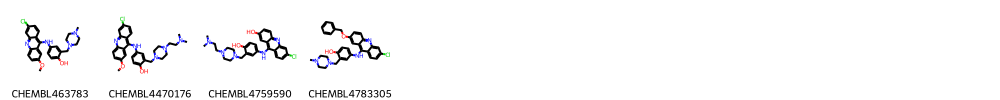

In [35]:
Draw.MolsToGridImage(working_library,molsPerRow=10,subImgSize=(100,100),
                     legends=[mol.GetProp('_Name') for mol in working_library])